# Tensorflow 1.0

텐서플로는 다양한 작업에대해 데이터 흐름 프로그래밍을 위한 오픈소스 소프트웨어 라이브러리이다. 심볼릭 수학 라이브러리이자, 뉴럴 네트워크같은 기계학습 응용프로그램에도 사용된다.

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
print(tf.__version__)

1.14.0


# 1. Simple Linear Regression 를 TensorFlow 로 구현하기

### Hypothesis

$H(x) = W(x) + b$

In [2]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

# Hypothesis : y = Wx + b
hypothesis = W * x_data + b

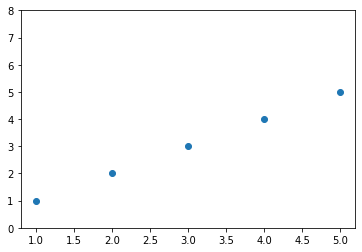

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

### Cost

$cost(W,b) = {1 \over m} \sum_{i=1}^{m}(H(x^{(i)}) - y^{(i)})^2$

In [4]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

### tf.reduce_mean()

In [5]:
v = [1., 2., 3., 4.]
tf.reduce_mean(v)   # 2.5

<tf.Tensor: id=31, shape=(), dtype=float32, numpy=2.5>

### tf.square()

In [6]:
tf.square(3)   # 9.0

<tf.Tensor: id=34, shape=(), dtype=int32, numpy=9>

### Gradient Descent 

$minimize\;cost(W,b)$

``` python
A.assign_sub(B)
A = A - B
A -= B
```

In [7]:
# learning_rate
learning_rate = 0.01

# Gradient Descent
with tf.GradientTape() as tape : 
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W,b])

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

print('W = {:.4f}, b = {:.4f}' .format(W.numpy(),b.numpy()))

W = 2.4520, b = 0.3760


###  Parameter Update

In [8]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

print('{:^5}|{:^10}|{:^10}|{:^10}' .format('i', 'W', 'b', 'cost'))

for i in range(100) :
    
    with tf.GradientTape() as tape : 
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
        
    W_grad, b_grad = tape.gradient(cost, [W,b])
    
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0 : 
        print('{:^5}|{:^10.4f}|{:^10.4f}|{:^10.6f}' .format(i, W.numpy(), b.numpy(), cost))

  i  |    W     |    b     |   cost   
  0  |  2.4520  |  0.3760  |45.660004 
 10  |  1.1036  |  0.0034  | 0.206336 
 20  |  1.0128  | -0.0209  | 0.001026 
 30  |  1.0065  | -0.0218  | 0.000093 
 40  |  1.0059  | -0.0212  | 0.000083 
 50  |  1.0057  | -0.0205  | 0.000077 
 60  |  1.0055  | -0.0198  | 0.000072 
 70  |  1.0053  | -0.0192  | 0.000067 
 80  |  1.0051  | -0.0185  | 0.000063 
 90  |  1.0050  | -0.0179  | 0.000059 


### Predict

$H(x) = Wx + b$

In [9]:
print(W * 5.0 + b)
print(W * 3.0 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.9970603, shape=(), dtype=float32)


# 2. Linear Regression and How to minimize cost 를 TensorFlow 로 구현하기

### cost function in pure python

$cost(W) = {1 \over m} \sum_{i=1}^{m}(W(x_{i}) - y_{i})^2$

In [10]:
import numpy as np
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_fnc(W,X,Y) : 
    c = 0
    for i in range(len(X)) : 
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num=15) :
    curr_cost = cost_fnc(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}" .format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


### cost function in Tensorflow

In [11]:
import numpy as np
X = np.array([1,2,3])
Y = np.array([1,2,3])

def cost_fnc(W, X, Y) : 
    hypothesis = X * W
    return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values :
    curr_cost = cost_fnc(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}" .format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


### Gradient Descent

$cost(W) = {1 \over m} \sum_{i=1}^{m}(W(x_{i}) - y_{i})^2$

==> $W := W - \alpha {1 \over m} \sum_{i=1}^{m}(W(x_{i}) - y_{i})x_i$

In [12]:
alpha = 0.01
gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,X) - Y, X))
descent = W - tf.multiply(alpha, gradient)
W.assign_sub(descent)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.00022470951>

In [13]:
# seed
tf.set_random_seed(1234)

# data
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

# weight
W = tf.Variable(tf.random.normal([1], -100, 100))

# Gradient Descent
for step in range(300) : 
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign_sub(descent)
    
    if step % 10 == 0 : 
        print('{:5}|{:10.4f}|{:10.6f}' .format(step,cost.numpy(),W.numpy()[0]))

    0| 1397.7949| -0.807653
   10|    5.1347| -0.048951
   20|    5.1347| -0.048951
   30|    5.1347| -0.048951
   40|    5.1347| -0.048951
   50|    5.1347| -0.048951
   60|    5.1347| -0.048951
   70|    5.1347| -0.048951
   80|    5.1347| -0.048951
   90|    5.1347| -0.048951
  100|    5.1347| -0.048951
  110|    5.1347| -0.048951
  120|    5.1347| -0.048951
  130|    5.1347| -0.048951
  140|    5.1347| -0.048951
  150|    5.1347| -0.048951
  160|    5.1347| -0.048951
  170|    5.1347| -0.048951
  180|    5.1347| -0.048951
  190|    5.1347| -0.048951
  200|    5.1347| -0.048951
  210|    5.1347| -0.048951
  220|    5.1347| -0.048951
  230|    5.1347| -0.048951
  240|    5.1347| -0.048951
  250|    5.1347| -0.048951
  260|    5.1347| -0.048951
  270|    5.1347| -0.048951
  280|    5.1347| -0.048951
  290|    5.1347| -0.048951


# 3. Multi-variable Linear Regression 를 TensorFlow 로 구현하기

In [14]:
# data and label
x1 = [73., 93., 89., 96., 73]
x2 = [80., 88., 91., 98., 66]
x3 = [75., 93., 90., 100., 70]
Y = [152., 185., 180., 196., 142]

# random weights
w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

# learning rate
learning_rate = 0.000001

# Predict funciton
def predict(X) :
    return tf.matmul(X, W) + b

n_epochs = 2000

# Multi-Variable-Linear-Regression
for i in range(n_epochs + 1) : 
    
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape : 
        hypothesis = w1*x1 + w2*x2 + w3*x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
        
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1,w2,w3,b])
    
    # update w1,w2,w3 and b
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)
    
    # process print
    if i % 50 == 0 : 
        print("{:5} | {:12.4f}" .format(i,cost.numpy()))

    0 |     551.4631
   50 |       9.5045
  100 |       3.4850
  150 |       3.4123
  200 |       3.4056
  250 |       3.3996
  300 |       3.3936
  350 |       3.3877
  400 |       3.3818
  450 |       3.3759
  500 |       3.3700
  550 |       3.3641
  600 |       3.3582
  650 |       3.3523
  700 |       3.3465
  750 |       3.3406
  800 |       3.3347
  850 |       3.3290
  900 |       3.3232
  950 |       3.3175
 1000 |       3.3117
 1050 |       3.3060
 1100 |       3.3003
 1150 |       3.2945
 1200 |       3.2889
 1250 |       3.2831
 1300 |       3.2774
 1350 |       3.2718
 1400 |       3.2661
 1450 |       3.2605
 1500 |       3.2549
 1550 |       3.2493
 1600 |       3.2438
 1650 |       3.2382
 1700 |       3.2326
 1750 |       3.2271
 1800 |       3.2215
 1850 |       3.2161
 1900 |       3.2106
 1950 |       3.2051
 2000 |       3.1996


### Matrix

$H(X) = XW$

In [15]:
data = np.array([[73.,  80.,  75.,  152.],
                 [93.,  88.,  93.,  185.],
                 [89.,  91.,  90.,  180.],
                 [96.,  98., 100.,  196.],
                 [73.,  66.,  70.,  142.]], dtype=np.float32)

# slice data
X = data[:, :-1]
print('X','\n',X,'\n')
y = data[:, [-1]]
print('y','\n',y,'\n')

W = tf.Variable(tf.random_normal([3,1]))
print('W','\n',W.numpy(),'\n')
b = tf.Variable(tf.random_normal([1]))
print('b','\n',b.numpy(),'\n')

def predict(X) :
    return tf.matmul(X,W) + b

X 
 [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]] 

y 
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]] 

W 
 [[-0.3198804 ]
 [ 1.3575249 ]
 [-0.15776916]] 

b 
 [0.80348307] 



# 4. Logistic Regression/Classification 를 TensorFlow 로 구현하기

In [16]:
x_train = [[1., 2.],
           [2., 3.],
           [3., 1.],
           [4., 3.],
           [5., 3.],
           [6., 2.]]

y_train = [[0.],
           [0.],
           [0.],
           [1.],
           [1.],
           [1.]]

x_test = [[5., 2.]]
y_test = [[1.]]

import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

def logistic_regression(features) : 
    hypothesis = tf.div(1., 1. + tf.exp(tf.matmul(feature, W) + b))
    return hypothesis

def loss_fn(features, labels) : 
    hypothesis = logistic_regression(features)
    cost = -tf.reduce_mean(labels * tf.log(loss_fn(hypothesis) + (1 - labels) * tf.log(1 - hypothesis)))
    return cost

def grad(hypothesis, features, labels) : 
    with tf.GradientTape() as tape : 
        loss_value = loss_fn(hypothesis, labels)
    return tape.gradient(loss_value, [W,b])

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

EPOCHS = 2000

for step in range(EPOCHS) : 
    for feature, labels in tfe.Iterator(dataset) : 
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
        if step % 100 == 0 : 
            print('iter : {}, Loss : {:.4f}' .format(step, loss_fn(logistic_regression(features), labels)))
            
def accuracy_fn(hypothesis, labels) : 
    predicted = tf.cast(hypothesis, labels)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

test_acc = accuracy_fn(logistic_regression(x_test), y_test)

NameError: name 'features' is not defined